In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# regularization introduction

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
n_samples,n_features=14,1
#np.random.seed(42)
x=np.random.random_sample(n_samples)*2*np.pi-np.pi
x=x.reshape(-1,1)
y=np.sin(x)+(np.random.random_sample(n_samples)*.1).reshape(-1,1)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)


In [6]:
x_i=np.linspace(-np.pi,np.pi,200).reshape(-1,1)
y_i=np.sin(x_i)

In [7]:
print('{} train samples'.format(x_train.shape[0]))
print('{} test samples'.format(x_test.shape[0]))

9 train samples
5 test samples


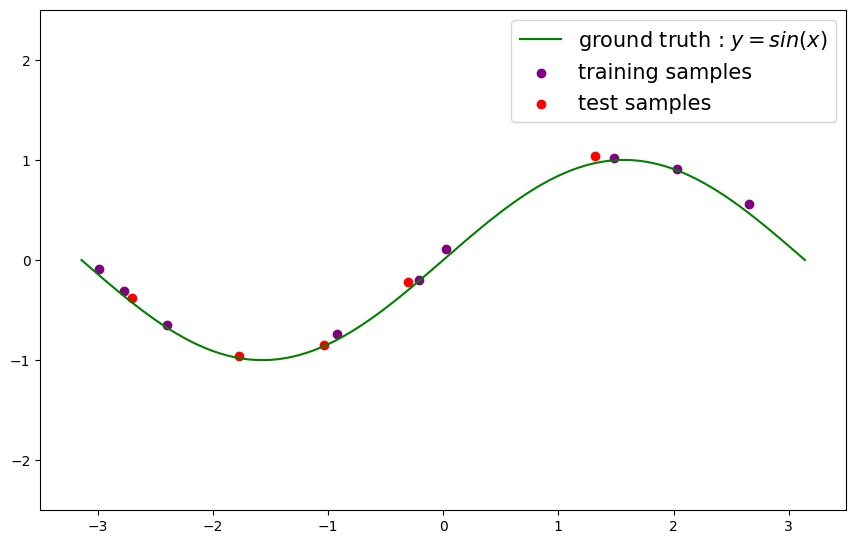

In [8]:
scale_factor=.65
plt.figure(figsize=(16*scale_factor,10*scale_factor))
plt.axis([-3.5,3.5,-2.5,2.5])
plt.plot(x_i,y_i,c='g',label='ground truth : $y=sin(x)$',)
plt.scatter(x_train,y_train,c='purple',label='training samples',)
plt.scatter(x_test,y_test,c='red',label="test samples",)
plt.legend(loc='best',fontsize=15)


In [9]:
from sklearn.kernel_ridge import KernelRidge

In [10]:
clf=KernelRidge(alpha=0,kernel='poly',degree=2) #classifier
clf.fit(x_train,y_train)

/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KernelRidge(alpha=0, degree=2, kernel='poly')

In [11]:
from numpy import linalg as la


In [12]:
error_train=la.norm(clf.predict(x_train)-y_train,'fro')
error_test=la.norm(clf.predict(x_test)-y_test,'fro')


In [13]:
clf.predict(x_train)-y_train

array([[-0.56360016],
       [-0.28476182],
       [ 0.47754916],
       [-0.20070571],
       [ 0.472973  ],
       [-0.08056453],
       [ 0.25962625],
       [-0.16264289],
       [ 0.0821267 ]])

In [14]:
clf.predict(x_test)-y_test

array([[ 0.08124558],
       [ 0.56553064],
       [-0.01298709],
       [-0.65422183],
       [ 0.59112535]])

In [15]:
error_train

0.9989333367400118

In [16]:
error_test

1.050728219002678

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_60562/1164656342.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')


Text(0.5, -2, 'test erroe=1.051')

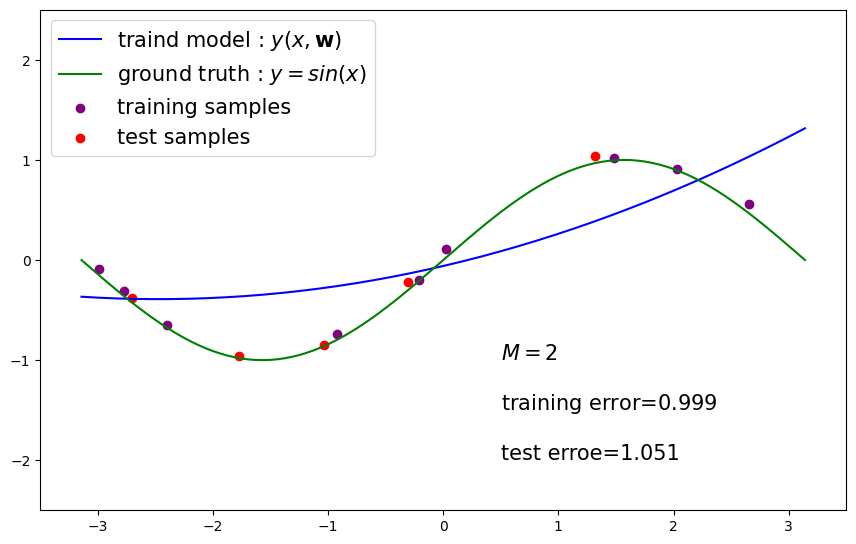

In [17]:
plt.figure(figsize=(16*scale_factor,10*scale_factor))
plt.axis([-3.5,3.5,-2.5,2.5])

plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')
plt.plot(x_i,y_i,c='g',label='ground truth : $y=sin(x)$',)
plt.scatter(x_train,y_train,c='purple',label='training samples',)
plt.scatter(x_test,y_test,c='red',label="test samples",)

plt.legend(loc='best',fontsize=15)
plt.text(.5,-1,'$M=2$',fontsize=15)
plt.text(.5,-1.5,'training error=${0:.3f}$'.format(error_train),fontsize=15)
plt.text(.5,-2,'test erroe={0:.3f}'.format(error_test),fontsize=15)


In [18]:
x_train.shape[0]-1

8

In [19]:
range(8)

range(0, 8)

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_60562/447793410.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')
/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/mohammad-

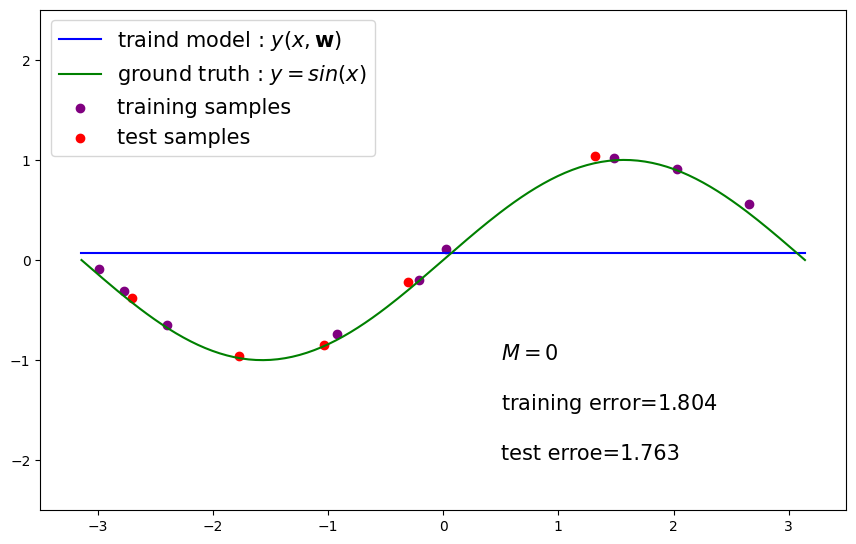

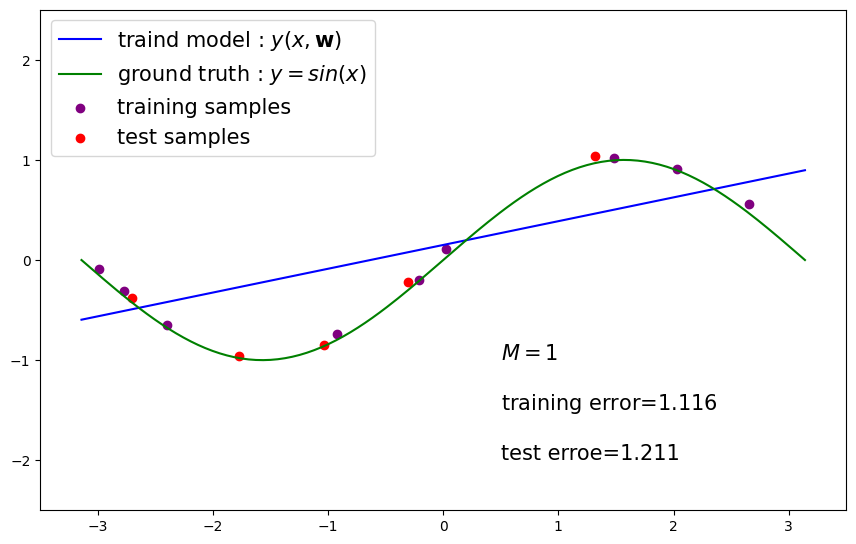

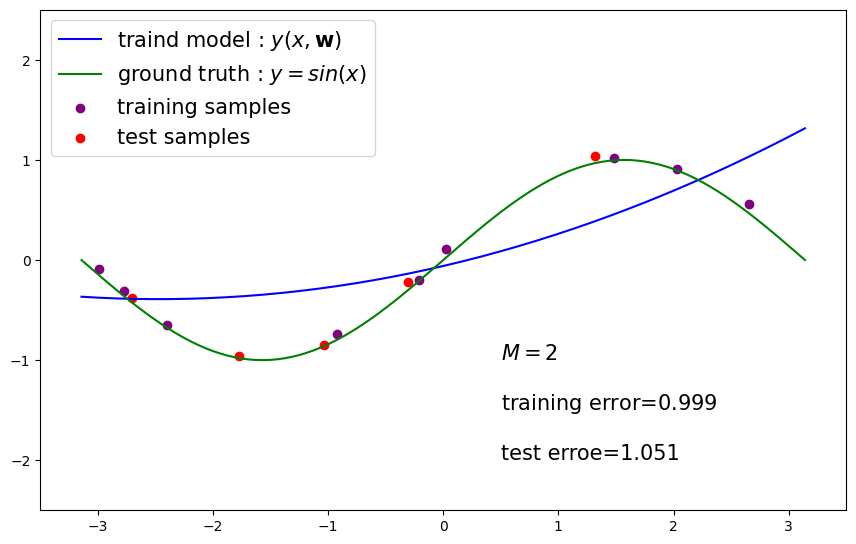

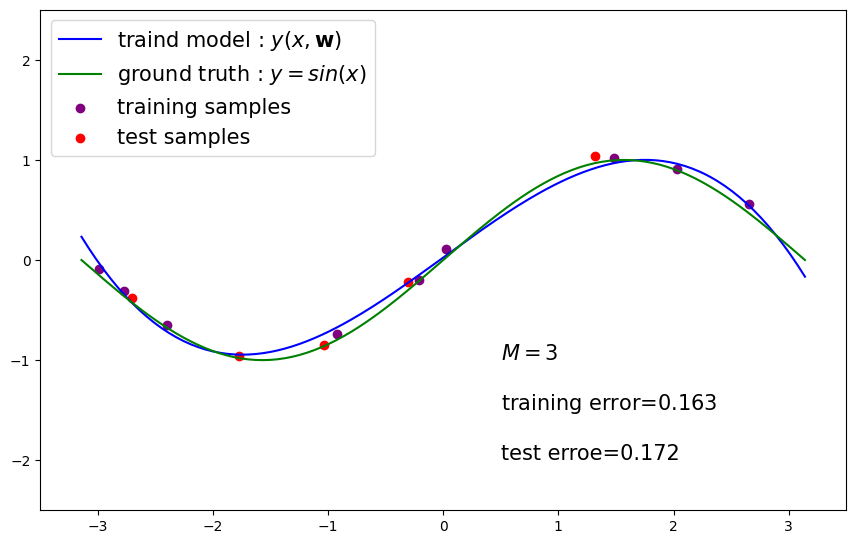

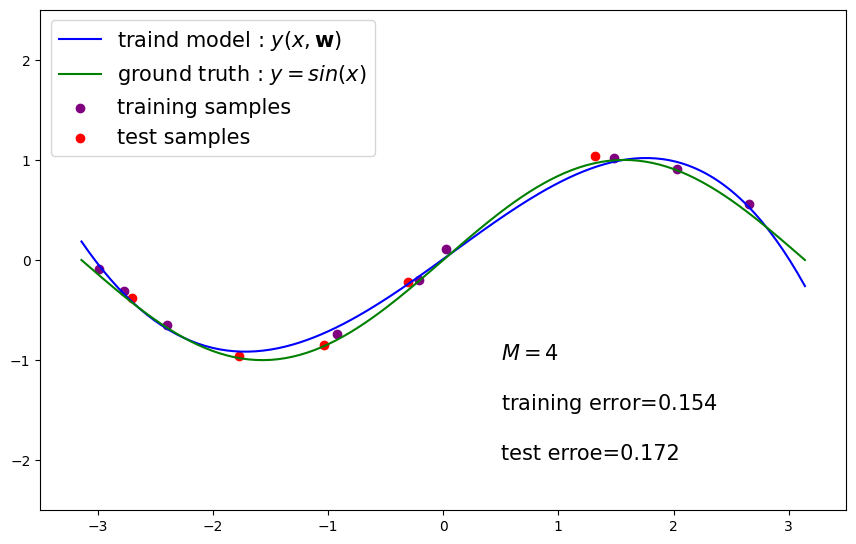

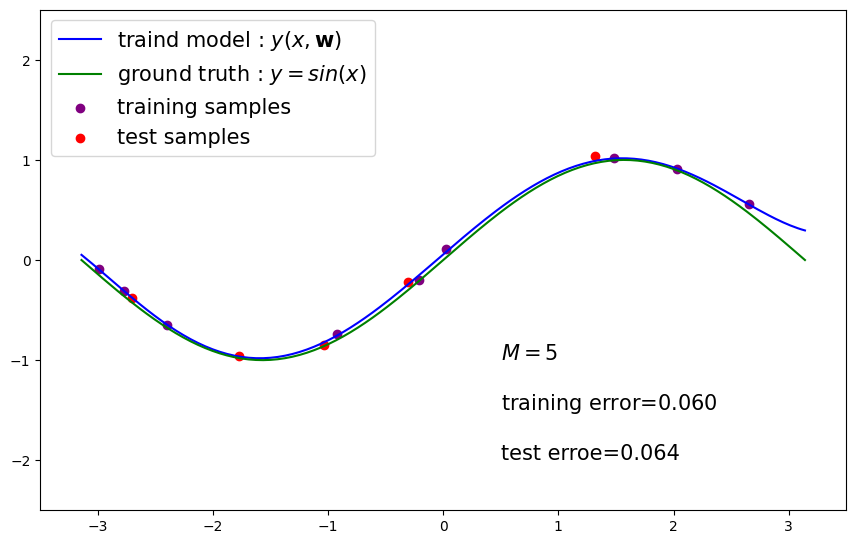

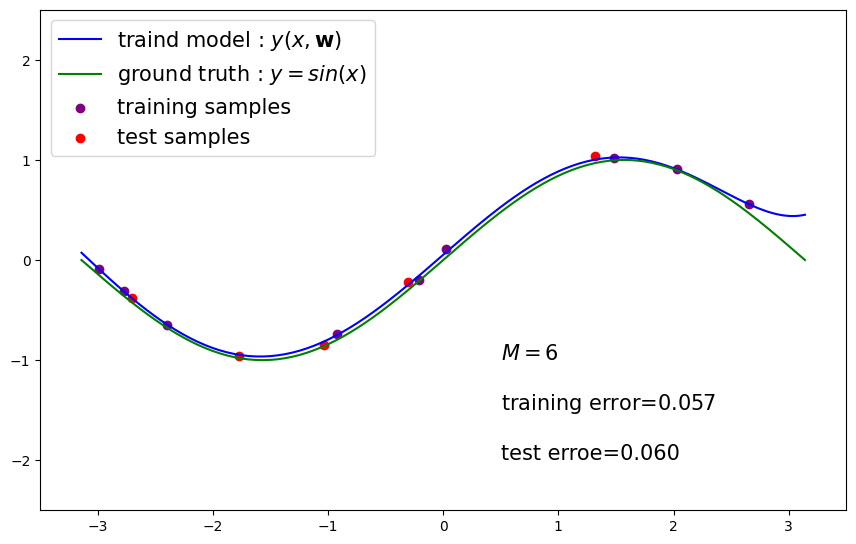

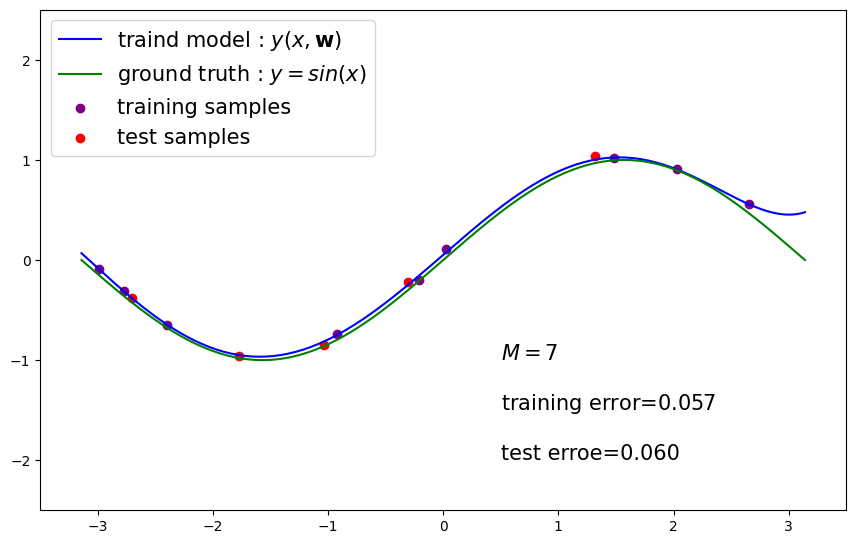

In [37]:
errors_train=[]
errors_test=[]

m_max=x_train.shape[0]-1

for m in range(m_max):
    
    clf=KernelRidge(alpha=0,kernel='poly',degree=m)
    clf.fit(x_train,y_train,)
    
    error_train=la.norm(clf.predict(x_train)-y_train,'fro')
    errors_train.append(error_train)
    error_test=la.norm(clf.predict(x_test)-y_test,'fro')
    errors_test.append(error_test)
    
    plt.figure(figsize=(16*scale_factor,10*scale_factor))
    plt.axis([-3.5,3.5,-2.5,2.5])
    
    plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')
    plt.plot(x_i,y_i,c='g',label='ground truth : $y=sin(x)$',)
    plt.scatter(x_train,y_train,c='purple',label='training samples',)
    plt.scatter(x_test,y_test,c='red',label="test samples",)
    
    plt.legend(loc='best',fontsize=15)
    plt.text(.5,-1,'$M={}$'.format(m),fontsize=15)
    plt.text(.5,-1.5,'training error=${0:.3f}$'.format(error_train),fontsize=15)
    plt.text(.5,-2,'test erroe={0:.3f}'.format(error_test),fontsize=15)


In [21]:
errors_test

[1.7633404773477708,
 1.2105162497673474,
 1.050728219002678,
 0.17192799697884972,
 0.17223208872741316,
 0.06419357806487272,
 0.0601519665019047,
 0.05961211136398662]

In [22]:
errors_train

[1.803909484503463,
 1.115513394064334,
 0.9989333367400118,
 0.1626369298255003,
 0.15439637960784736,
 0.059576891235060464,
 0.05699384498537768,
 0.05697050612694468]

In [23]:
[i for i in range(len(errors_train))]

[0, 1, 2, 3, 4, 5, 6, 7]

In [24]:
[np.arange(len(errors_train))]

[array([0, 1, 2, 3, 4, 5, 6, 7])]

(0.01, 5)

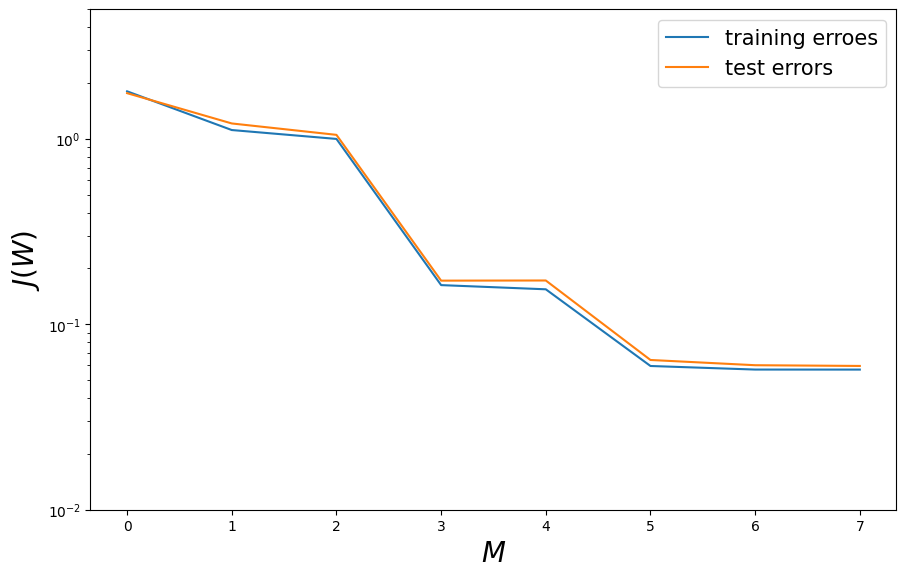

In [25]:
x_m=[i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10*scale_factor))
#plt.axis([-3.5,3.5,-2.5,2.5])

plt.plot(x_m,errors_train,label='training erroes')
plt.plot(x_m,errors_test,label='test errors')
plt.legend(loc='best',fontsize=15)
plt.xlabel('$M$',fontsize=20)
plt.ylabel('$J(W)$',fontsize=20)
plt.yscale('log')
plt.ylim(.01,5)

In [26]:
x_m

[0, 1, 2, 3, 4, 5, 6, 7]

In [27]:
errors_test

[1.7633404773477708,
 1.2105162497673474,
 1.050728219002678,
 0.17192799697884972,
 0.17223208872741316,
 0.06419357806487272,
 0.0601519665019047,
 0.05961211136398662]

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_60562/1504179228.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')


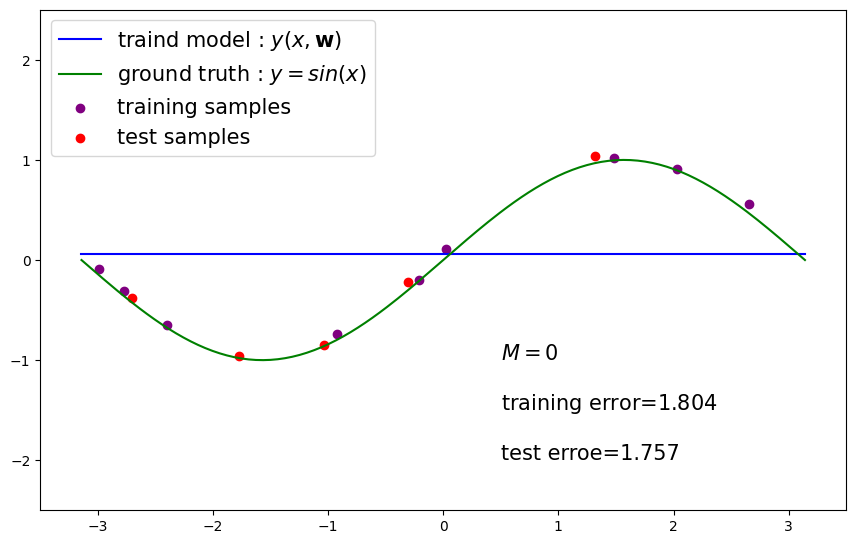

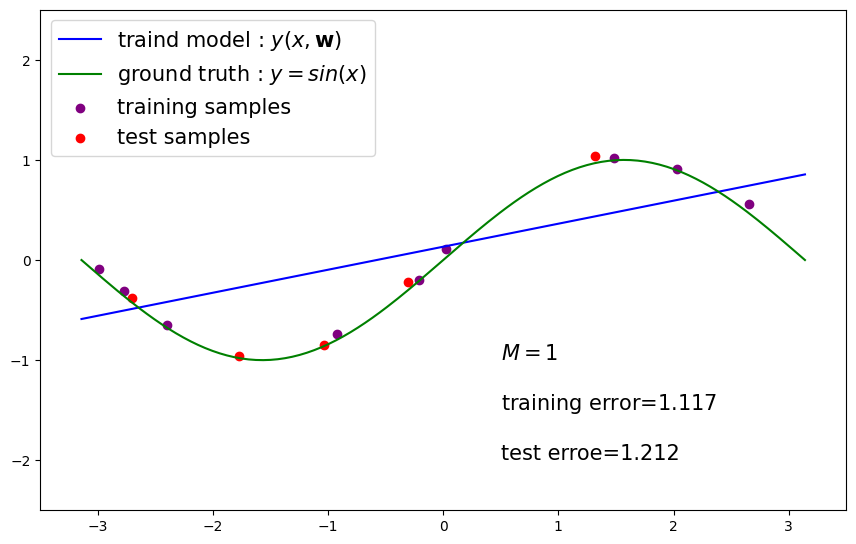

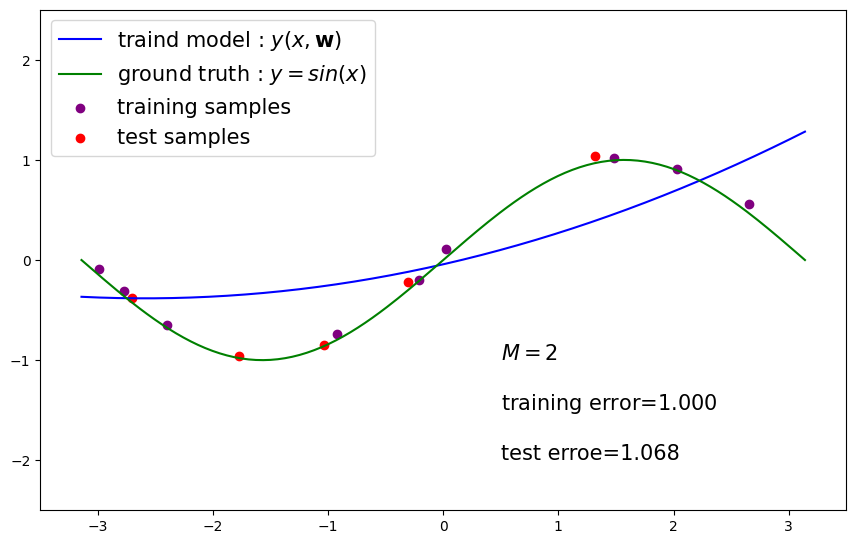

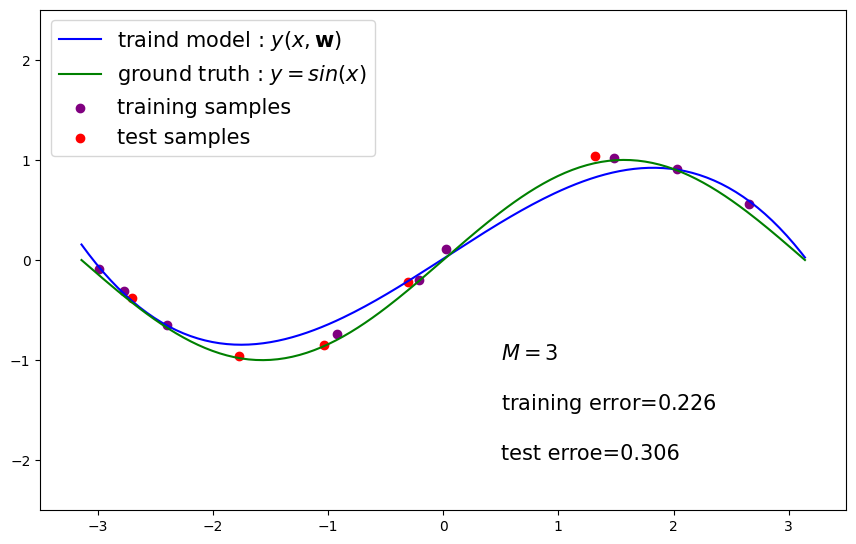

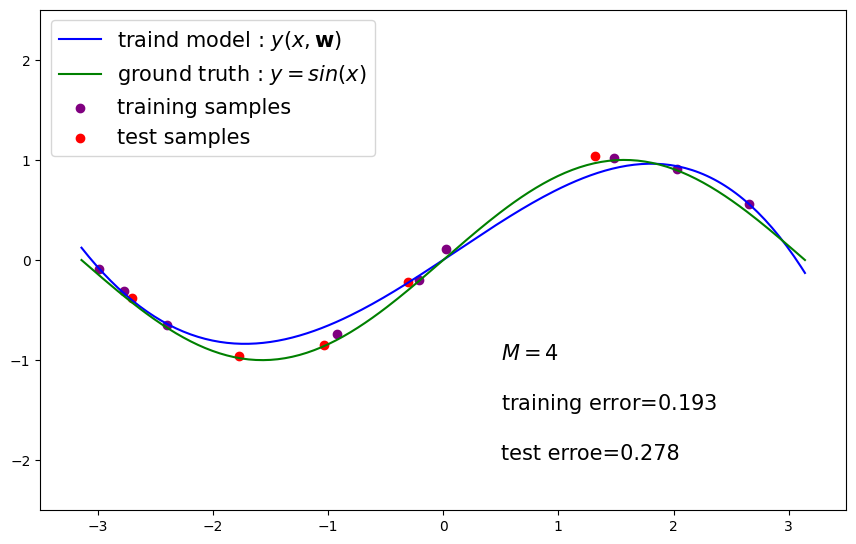

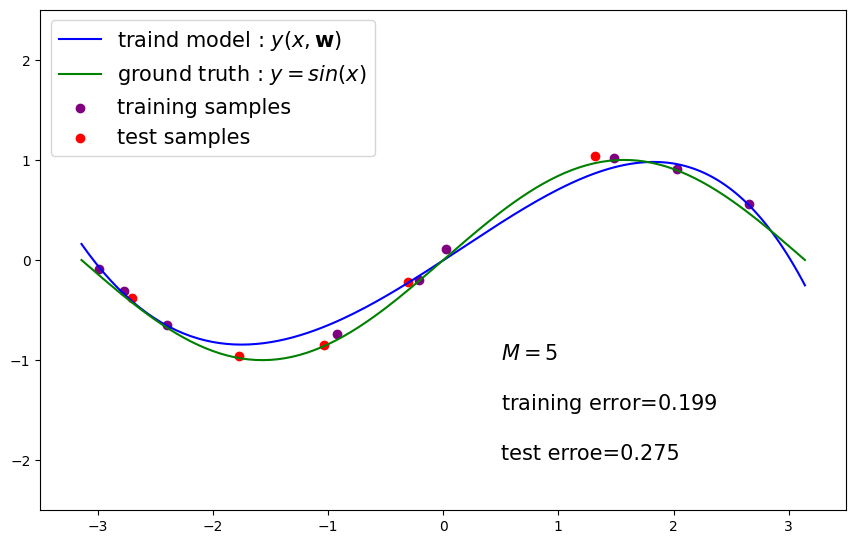

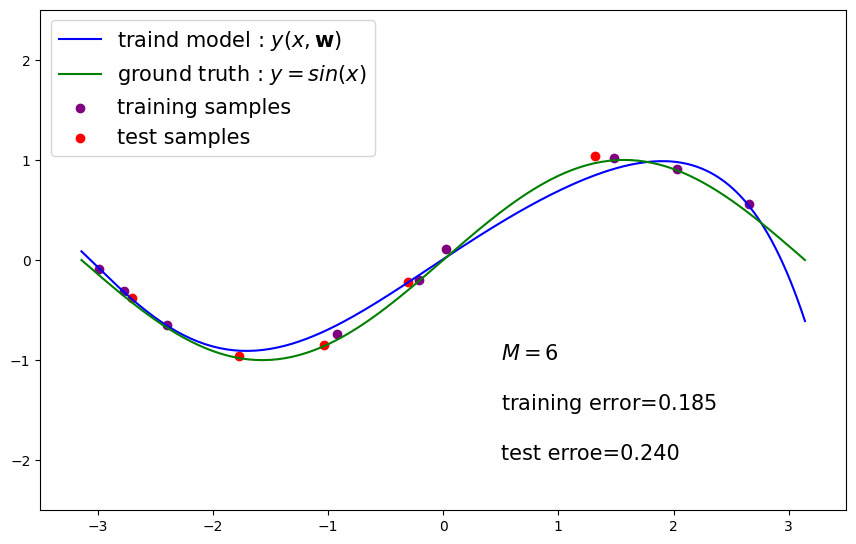

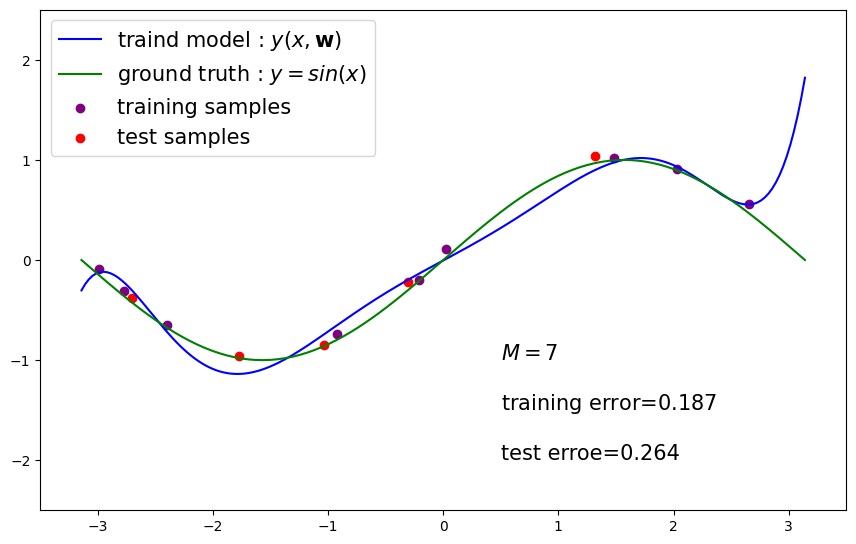

In [28]:
errors_train_reg=[]
errors_test_reg=[]

m_max=x_train.shape[0]-1

for m in range(m_max):
    
    clf=KernelRidge(alpha=1,kernel='poly',degree=m)
    clf.fit(x_train,y_train,)
    
    error_train=la.norm(clf.predict(x_train)-y_train,'fro')
    errors_train_reg.append(error_train)
    error_test=la.norm(clf.predict(x_test)-y_test,'fro')
    errors_test_reg.append(error_test)
    
    plt.figure(figsize=(16*scale_factor,10*scale_factor))
    plt.axis([-3.5,3.5,-2.5,2.5])
    
    plt.plot(x_i,clf.predict(x_i),c='blue',label='traind model : $y(x, \mathbf{w})$')
    plt.plot(x_i,y_i,c='g',label='ground truth : $y=sin(x)$',)
    plt.scatter(x_train,y_train,c='purple',label='training samples',)
    plt.scatter(x_test,y_test,c='red',label="test samples",)
    
    plt.legend(loc='best',fontsize=15)
    plt.text(.5,-1,'$M={}$'.format(m),fontsize=15)
    plt.text(.5,-1.5,'training error=${0:.3f}$'.format(error_train),fontsize=15)
    plt.text(.5,-2,'test erroe={0:.3f}'.format(error_test),fontsize=15)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_60562/2565193837.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_m,errors_train,label='training erroes $(\lambda=0)$')
/tmp/ipykernel_60562/2565193837.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_m,errors_test,label='test errors $(\lambda=0)$')
/tmp/ipykernel_60562/2565193837.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_m,errors_train_reg,label='training erroes $(\lambda=1)$')
/tmp/ipykernel_60562/2565193837.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_m,errors_test_reg,label='test errors $(\lambda=1)$')


(0.01, 5)

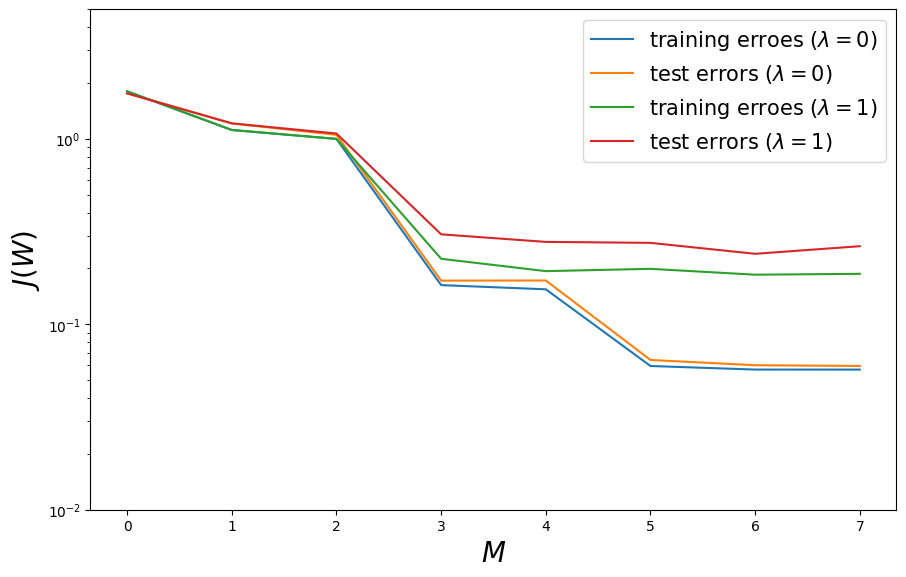

In [29]:
x_m=[i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10*scale_factor))
#plt.axis([-3.5,3.5,-2.5,2.5])

plt.plot(x_m,errors_train,label='training erroes $(\lambda=0)$')
plt.plot(x_m,errors_test,label='test errors $(\lambda=0)$')
plt.plot(x_m,errors_train_reg,label='training erroes $(\lambda=1)$')
plt.plot(x_m,errors_test_reg,label='test errors $(\lambda=1)$')

plt.legend(loc='best',fontsize=15)
plt.xlabel('$M$',fontsize=20)
plt.ylabel('$J(W)$',fontsize=20)
plt.yscale('log')
plt.ylim(.01,5)

In [30]:
print('(no regularization ,λ=0) --> M= {}'.format(np.argmin(errors_train))) #returns index of minimum

(no regularization ,λ=0) --> M= 7


In [31]:
print(' (regularization ,λ=1) --> M= {}'.format(np.argmin(errors_train_reg)))

 (regularization ,λ=1) --> M= 6


In [32]:
np.min(errors_train) #returns value ofminimum

0.05697050612694468

In [33]:
np.min(errors_train_reg)

0.1850916024285707

In [34]:
errors_train

[1.803909484503463,
 1.115513394064334,
 0.9989333367400118,
 0.1626369298255003,
 0.15439637960784736,
 0.059576891235060464,
 0.05699384498537768,
 0.05697050612694468]

In [35]:
errors_train_reg

[1.8040261102272923,
 1.1173517518258984,
 0.9997222433308217,
 0.22553691028239892,
 0.19346772386291236,
 0.1990680635330748,
 0.1850916024285707,
 0.18709898127424446]